In [109]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [85]:
a = np.array([[1, 2],[3,4]])
b = a/a.sum(axis=0)
b

array([[0.25      , 0.33333333],
       [0.75      , 0.66666667]])

In [110]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='←True label（列）\n',
           xlabel='\n→Predicted label（行）')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [253]:
def patternConcat(pattern, kind, hold_position):
    pattern = str(pattern)
    pattern_data = np.load("pattern" + pattern + "/" + kind + "_pattern" + pattern + ".npy").reshape([-1, 1])
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
    
    file_path = "pattern" + pattern + "/" + kind + "_" + hold_position + "_"
    kumano1 = np.load(file_path + "熊野分類1.npy")
    
    sekiguchi = np.load(file_path + "関口分類.npy")
    
    abe = np.load(file_path + "安部分類.npy")
    
    kumano2 = np.load(file_path + "熊野分類2.npy")
    print(kumano2.shape)
    
    if kind == "train":
        abe = np.delete(abe, 120845, 0)
        kumano1 = np.delete(kumano1, 120845, 0)
        kumano2 = np.delete(kumano2, 120845, 0)
    
#     yokoyama = np.load(file_path + "横山分類.npy")
#     kumano2 = np.load(file_path + "熊野分類2.npy")
    print(pattern_data.shape, label.shape, sekiguchi.shape, abe.shape)
#     result = np.concatenate([pattern_data, label, kumano1, sekiguchi, abe, yokoyama, kumano2], axis=1)
    result = np.concatenate([pattern_data, label, kumano1, sekiguchi, abe, kumano2], axis=1).astype(np.int32)
#     result = pd.DataFrame(result, columns=["pattern", "label", "kumano1", "sekiguchi", "abe", "yokoyama", "kumano2"])
    result = pd.DataFrame(result, columns=["pattern", "label", "kumano1", "sekiguchi", "abe", "kumano2"])
    return result

In [259]:
file_path = "pattern4/train_Bag_"
a = np.load(file_path + "熊野分類2.npy")
np.unique(a)

array([0, 1], dtype=int64)

In [284]:
pattern2 = patternConcat(2, "validation", "Bag")
pattern2.shape

FileNotFoundError: [Errno 2] No such file or directory: 'pattern2/validation_Bag_熊野分類2.npy'

## 個人ごとの成績をチェック

In [238]:
def kumano1Test(x):
    x = x.copy()
    class_names = ['Other', 'Run']
    x.loc[x['label'] != 3, 'label'] = 0
    x.loc[x['label'] == 3, 'label'] = 1
    print(round(f1_score(x[(x['pattern'] == 2)]['kumano1'], x[(x['pattern'] == 2)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2)]['kumano1'], x[(x['pattern'] == 2)]['label'], class_names, False, 16)

In [239]:
def sekiguchiTest(x):
    x = x.copy()
    class_names = ['Other', 'Walking', 'Run', 'Bike']
    x.loc[x['label'] == 1, 'label'] = 0
    x.loc[x['label'] >= 5, 'label'] = 0
    x.loc[x['label'] >= 2, 'label'] += -1
    print(round(f1_score(x[(x['pattern'] == 2)]['sekiguchi'], x[(x['pattern'] == 2)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2)]['sekiguchi'], x[(x['pattern'] == 2)]['label'], class_names, False, 24)

In [240]:
def abeTest(x):
    x = x.copy()
    class_names = ['Still', 'Car or Bus', 'Train or Subway']
    x.loc[(x['label'] >= 2) & (x['label'] <= 4), 'label'] = 3 
    x.loc[x['label'] == 1, 'label'] = 0
    x.loc[x['label'] == 5, 'label'] = 1
    x.loc[x['label'] == 6, 'label'] = 1
    x.loc[x['label'] == 7, 'label'] = 2
    x.loc[x['label'] == 8, 'label'] = 2
    print(round(f1_score(x[(x['pattern'] == 2) & (x['label'] <= 2)]['abe'], x[(x['pattern'] == 2) & (x['label'] <= 2)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2) & (x['label'] <= 2)]['abe'], x[(x['pattern'] == 2) & (x['label'] <= 2)]['label'], class_names, True, 24)

In [241]:
def yokoyamaTest(x):
    x = x.copy()
    class_names = ['Car', 'Bus']
    x.loc[(x['label'] >= 1) & (x['label'] <= 4), 'label'] = 2
    x.loc[(x['label'] >= 7) & (x['label'] <= 8), 'label'] = 2
    x.loc[x['label'] == 5, 'label'] = 0
    x.loc[x['label'] == 6, 'label'] = 1
    print(round(f1_score(x[(x['pattern'] == 2) & (x['label'] <= 1)]['yokoyama'], x[(x['pattern'] == 2) & (x['label'] <= 1)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2) & (x['label'] <= 1)]['yokoyama'], x[(x['pattern'] == 2) & (x['label'] <= 1)]['label'], class_names, True, 24)

In [242]:
def kumano2Test(x):
    x = x.copy()
    class_names = ['Train', 'Subway']
    x.loc[(x['label'] >= 1) & (x['label'] <= 4), 'label'] = 2
    x.loc[(x['label'] >= 5) & (x['label'] <= 6), 'label'] = 2
    x.loc[x['label'] == 7, 'label'] = 0
    x.loc[x['label'] == 8, 'label'] = 1
    print(round(f1_score(x[(x['pattern'] == 2) & (x['label'] <= 1)]['kumano2'], x[(x['pattern'] == 2) & (x['label'] <= 1)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2) & (x['label'] <= 1)]['kumano2'], x[(x['pattern'] == 2) & (x['label'] <= 1)]['label'], class_names, True, 24)

In [227]:
def kumano1Test(x):
    x = x.copy()
    class_names = ['Other', 'Run']
    x['label2'] = 0
    x.loc[x['label'] != 3, 'label2'] = 0
    x.loc[x['label'] == 3, 'label2'] = 1
    print(round(f1_score(x[(x['pattern'] == 2)]['kumano1'], x[(x['pattern'] == 2)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2)]['kumano1'], x[(x['pattern'] == 2)]['label'], class_names, False, 16)
    print(x[(x['kumano1'] == 1) & (x['label2'] == 0)])

In [262]:
pattern2['kumano2'].unique()

array([0, 1])

In [205]:
pattern2

,pattern,label,kumano1,sekiguchi,abe
0,2,3,0,0,2
1,2,3,0,0,2
2,2,3,1,0,2
3,2,3,1,0,2
4,2,3,1,0,2
...,...,...,...,...,...
28680,1,2,0,0,1
28681,1,2,0,0,1
28682,1,2,0,0,1
28683,1,2,0,0,1


0.986


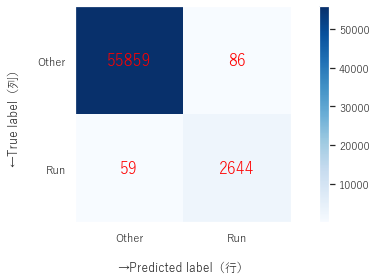

In [264]:
kumano1Test(pattern2)
plt.grid(False)

0.783


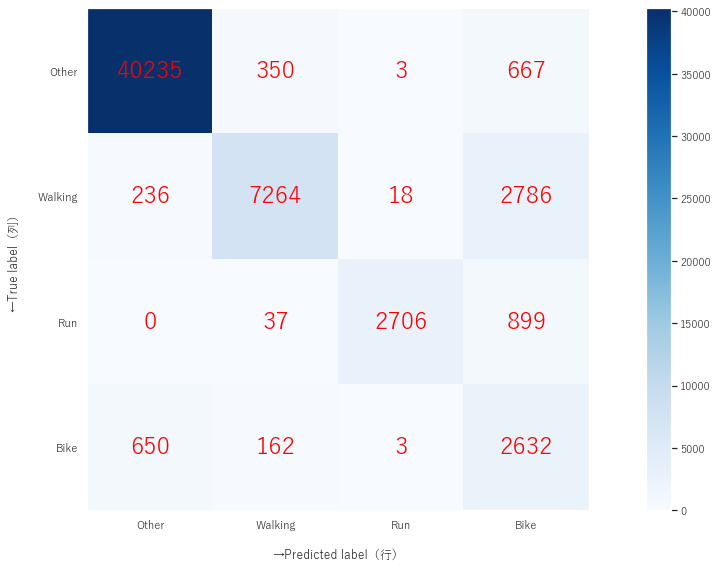

In [265]:
sekiguchiTest(pattern2)
plt.grid(False)

0.793


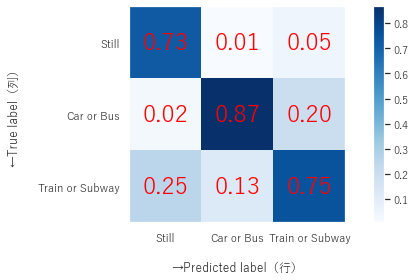

In [266]:
abeTest(pattern2)
plt.grid(False)

0.642


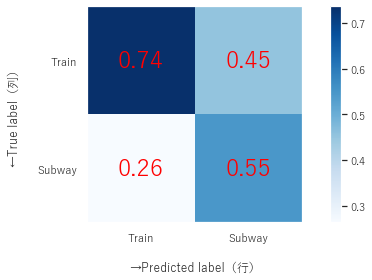

In [275]:
kumano2Test(pattern2)
plt.grid(False)

## 総合結果を出力する

In [195]:
def cal_result(x):
    x = x.copy()
    x['result'] = 0
    x.loc[x['sekiguchi'] == 2, 'result'] = 2 # 熊野くんの分類で1が出力されればRunで確定
    x.loc[(x['kumano1'] == 1) & (x['sekiguchi'] == 0), 'result'] = 1
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0), 'result'] = 0
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 1), 'result'] = 1 # 熊野くんの分類で0で関口分類で1ならWalkingで確定
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 2), 'result'] = 2 # 熊野くんの分類で0で関口分類で2ならRunで確定
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 3), 'result'] = 3 # 熊野くんの分類で0で関口分類で3ならBikeで確定
    
    x['label'] = x['label'] - 1
    x.loc[(x['label'] >= 4), 'label'] = 0
    
    
    return x

In [277]:
def cal_result(x):
    x = x.copy()
    x['result'] = 0
    x.loc[x['kumano1'] == 1, 'result'] = 2 # 熊野くんの分類で1が出力されればRunで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0), 'result'] = 0
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 1), 'result'] = 1 # 熊野くんの分類で0で関口分類で1ならWalkingで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 2), 'result'] = 2 # 熊野くんの分類で0で関口分類で2ならRunで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 3), 'result'] = 3 # 熊野くんの分類で0で関口分類で3ならBikeで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 0), 'result'] = 0 # 熊野くんの分類で0で関口分類で0→安部くん分類0→Still
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 1), 'result'] = 4 # 熊野くんの分類で0で関口分類で0→安部くん分類0→Still
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 2), 'result'] = 5 # 熊野くんの分類で0で関口分類で0→安部くん分類0→Still
    
    x['label'] = x['label'] - 1
    x.loc[(x['label'] == 5), 'label'] = 4
    x.loc[(x['label'] == 6), 'label'] = 5
    x.loc[(x['label'] == 7), 'label'] = 5
    
    
    return x

In [281]:
def cal_result(x):
    x = x.copy()
    x['result'] = 0
    
    x.loc[x['sekiguchi'] == 2, 'result'] = 3
    x.loc[(x['sekiguchi'] == 0) & (x['kumano1'] == 1), 'result'] = 3
    
#     x.loc[x['kumano1'] == 1, 'result'] = 3 # 熊野くんの分類で1が出力されればRunで確定
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 1), 'result'] = 2 # 熊野くんの分類で0で関口分類で1ならWalkingで確定
    x.loc[(x['sekiguchi'] == 1), 'result'] = 2 # 関口分類で1ならWalkingで確定
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 2), 'result'] = 3 # 熊野くんの分類で0で関口分類で2ならRunで確定
    x.loc[(x['sekiguchi'] == 3), 'result'] = 4 # 関口分類で3ならBikeで確定
#     x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 3), 'result'] = 4 # 熊野くんの分類で0で関口分類で3ならBikeで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 0), 'result'] = 1 # 熊野くんの分類で0で関口分類で0で安部くんの分類で0ならStillで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 1), 'result'] = 5 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で横山くん分類で0ならCarで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 2) & (x['kumano2'] == 0), 'result'] = 7 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で熊野くん分類で0ならTrainで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 2) & (x['kumano2'] == 1), 'result'] = 8 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で熊野くん分類で1ならSubwayで確定
    
    x.loc[x['label'] == 6, 'label'] = 5
    
    
    return x

In [282]:
def result_plot(x):
    class_names = ['Still', 'Walking', 'Run', 'Bike', 'Car or Bus', 'Train or Subway']
    print(round(f1_score(x[(x['pattern'] == 2)]['result'], x[(x['pattern'] == 2)]['label'], average='macro'), 3))
    plot_confusion_matrix(x[(x['pattern'] == 2)]['result'], x[(x['pattern'] == 2)]['label'], class_names, False, 24)

# ユーザ1データ5割　＋　ユーザ2データ5割 + ユーザ3データ5割　：　学習させたデータ
# ユーザ1データ後
3割

0.673


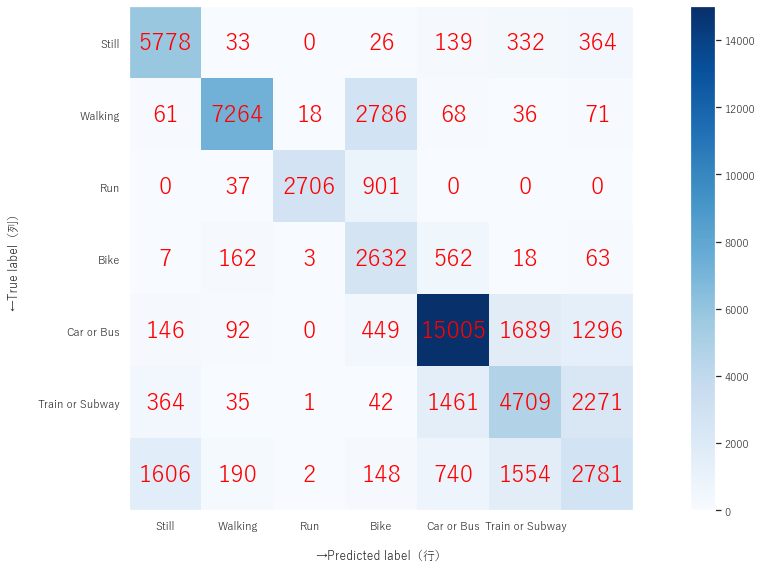

In [283]:
pattern2_result = cal_result(pattern2)
result_plot(pattern2_result)
plt.grid(False)

In [ ]:
def cal_result(x):
    x = x.copy()
    x['result'] = 0
    x.loc[x['kumano1'] == 1, 'result'] = 3 # 熊野くんの分類で1が出力されればRunで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 1), 'result'] = 2 # 熊野くんの分類で0で関口分類で1ならWalkingで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 2), 'result'] = 3 # 熊野くんの分類で0で関口分類で2ならRunで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 3), 'result'] = 4 # 熊野くんの分類で0で関口分類で3ならBikeで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 0), 'result'] = 1 # 熊野くんの分類で0で関口分類で0で安部くんの分類で0ならStillで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 1) & (x['yokoyama'] == 0), 'result'] = 5 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で横山くん分類で0ならCarで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 1) & (x['yokoyama'] == 1), 'result'] = 6 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で横山くん分類で1ならBusで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 2) & (x['kumano2'] == 0), 'result'] = 7 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で熊野くん分類で0ならTrainで確定
    x.loc[(x['kumano1'] == 0) & (x['sekiguchi'] == 0) & (x['abe'] == 2) & (x['kumano2'] == 1), 'result'] = 8 # 熊野くんの分類で0で関口分類で0で安部くんの分類で1で熊野くん分類で1ならSubwayで確定
    
    return x

In [29]:
def result_plot(x):
    class_names = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']
    print(round(f1_score(x['result'], x['label'], average='macro'), 3))
    plot_confusion_matrix(x['result'], x['label'], class_names, True, 32)

In [ ]:
pattern2_result = cal_result(pattern2)
result_plot(pattern2_result)
plt.grid(False)

In [ ]:
pattern2[(pattern2['label'] == 7) & (pattern2['sekiguchi'] == 0) & (pattern2['abe'] == 1)]

In [78]:
pattern2[(pattern2['label'] == 1) & (pattern2['pattern']==2)]

,pattern,label,kumano1,sekiguchi,abe
137020,2,1,0,0,2
137021,2,1,0,0,0
137022,2,1,0,0,2
137023,2,1,0,0,2
137024,2,1,0,0,2
...,...,...,...,...,...
194152,2,1,0,0,1
194153,2,1,0,0,1
194154,2,1,0,3,2
194155,2,1,0,3,1


In [105]:
pattern_data = np.load("pattern3/validation_pattern3.npy").reshape([-1, 1])
pattern_data.shape

(28685, 1)

In [106]:
label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
label.shape

(28685, 1)

In [96]:
label = np.delete(label, 120845, 0)
label.shape

(195490, 1)

In [107]:
a = np.concatenate([pattern_data, label], axis=1)
a = pd.DataFrame(a, columns=['pattern', 'label'])
a

,pattern,label
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
28680,2.0,2.0
28681,2.0,2.0
28682,2.0,2.0
28683,2.0,2.0


In [108]:
a[(a['pattern'] == 1) & (a['label'] == 3)]

,pattern,label
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
251,1.0,3.0
252,1.0,3.0
253,1.0,3.0
254,1.0,3.0


In [163]:
pattern2['sekiguchi'].unique()

array([2, 1, 0, 3])

In [171]:
pattern2[(pattern2['pattern'] == 2) & (pattern2['label'] == 4)]

,pattern,label,kumano1,sekiguchi,abe
26163,2,4,0,0,2
26164,2,4,0,1,1
26165,2,4,0,3,1
26166,2,4,0,3,1
26167,2,4,0,3,1
...,...,...,...,...,...
27655,2,4,0,1,1
27656,2,4,0,0,1
27657,2,4,0,0,2
27658,2,4,0,0,2
